# Inital Setup's for analysis

# Objectives

## My analysis will be more focussed towards Indian Developers

1. General things
    - To analyse the amount of developers from India Participating in this survery
    - To analyse the proffession, interest and background of those developers
    - To analyse the field of work of Indian developers
    - Distribution of student among India developers

2. Demographics and education
    - What is the age distribution of Indian developers?
    - How many Indian developers identify as self-taught, formally educated, or bootcamp graduates?

4. Professional Life
    - What is the average work experience of developers in India?
    - What is the distribution of annual compensation for Indian developers according to their age?
    - Make a histogram on the compansesation of India developers

5. Technology and Skills
    - What programming languages, tools, and frameworks are most popular among Indian developers?
    - Which technologies are Indian developers most interested in learning?
    - What percentage of Indian developers work on open-source projects?
    - Most Used Web Framework withing India Developers

6. AI related
    - Distribution of utilisation of AI by Indian developers (on type of work done by AI)
    - Sentiment of Indian Developers who thinks AI is threat, on the basis of their workex.

7. Operating System
    - To compare the level of experience of different operating system users
    - To see the distribution of total number of os users in pie chart

8. DevTools
    - Make a Bar chart showing how many people uses which tool to write their code
    - Make a line chart of DevTools vs Average salary of devs using them


### Loading required packages

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [71]:
df = pd.read_csv("data/survey_results_public.csv")
schema_df = pd.read_csv("data/survey_results_schema.csv")


### Filtering rows which concerns us i.e. (Data of India users)

In [72]:
df = df.loc[df.Country == "India"]


# Some Data Cleaning

In [73]:
# Remoing not so usefull columns        
df.drop("Check",axis=1,inplace=True)

In [74]:
df.loc[(df.Employment.str.contains("Student, full-time")) & (~df.RemoteWork.isnull())]
df.loc[df["RemoteWork"].isnull(),"RemoteWork"] = "Not Intrested"
df.columns
columns_to_drop = df.columns[df.columns.get_loc("JobSatPoints_1"):]
df.drop(columns=columns_to_drop,inplace=True)

In [75]:
columns_to_drop = [col for col in df.columns if "Knowledge_" in col]
df.drop(columns=columns_to_drop,inplace=True)

In columns where the survery took input about programming language currently using, admired etc are ";" separated string of names of programming language

- So for each such type of column i will make a list out of strings using ";" as a delimiter 
- then i will explode all such columns one by one two avoid alignment issues
- then store them as series in different variables
- and then use those series to perform different operations

In [76]:
# language_have_worked_with = df["LanguageHaveWorkedWith"].str.split(";")
# language_want_to_work_with = df["LanguageWantToWorkWith"].str.split(";")
# language_admired = df["LanguageAdmired"].str.split(";")

series_of_languages_have_worked_with = (
    df.dropna(subset=["LanguageHaveWorkedWith"])["LanguageHaveWorkedWith"]
    .str.split(";")
    .explode()
)
series_of_languages_want_to_work_with = (
    df.dropna(subset=["LanguageWantToWorkWith"])["LanguageWantToWorkWith"]
    .str.split(";")
    .explode()
)
series_of_languages_admire_to_work_with = (
    df.dropna(subset=["LanguageAdmired"])["LanguageAdmired"].str.split(";").explode()
)

# series_of_languages_admire_to_work_with.value_counts()
# series_of_languages_want_to_work_with.value_counts()
# series_of_languages_have_worked_with.value_counts()[:10].plot.bar()

In [77]:
# filling na's in YearsCode and YearsCodePro column
# handling strings
df.loc[:, "YearsCode"] = pd.to_numeric(df["YearsCode"], errors="coerce")
df.loc[:, "YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")

# i'm not handling the case where both the column are NaN's
df.loc[:, "YearsCode"] = df.apply(
    lambda row: row["YearsCodePro"] if pd.isna(row["YearsCode"]) else row["YearsCode"],
    axis=1,
)
df.loc[:, "YearsCodePro"] = df.apply(
    lambda row: row["YearsCode"]
    if pd.isna(row["YearsCodePro"])
    else row["YearsCodePro"],
    axis=1,
)

df.loc[:, "YearsCode"] = df.apply(
    lambda row: 0
    if pd.isna(row["YearsCode"]) and pd.isna(row["YearsCodePro"])
    else row["YearsCode"],
    axis=1,
)
df.loc[:, "YearsCodePro"] = df.apply(
    lambda row: 0
    if pd.isna(row["YearsCodePro"]) and pd.isna(row["YearsCode"])
    else row["YearsCodePro"],
    axis=1,
)

print(df.YearsCode)
df.YearsCodePro

17        6.0
58        4.0
75        4.0
89        2.0
96       11.0
         ... 
65339     4.0
65383     9.0
65413     3.0
65415     4.0
65428     4.0
Name: YearsCode, Length: 4231, dtype: object


17       3.0
58       4.0
75       4.0
89       2.0
96       7.0
        ... 
65339    2.0
65383    9.0
65413    3.0
65415    4.0
65428    7.0
Name: YearsCodePro, Length: 4231, dtype: object

In [78]:
# discarding YearsCodePro and only keeping YearsCode
# first we will keep 
#   store the max of both in YearsCode


df.loc[:,"YearsCode"] = df.apply(lambda row: max(row["YearsCodePro"],row["YearsCode"]), axis=1)

# dropping YearsCodePro

df.drop(columns=["YearsCodePro"],inplace=True)

In [89]:
df.to_csv("/tmp/data_dav.csv")

Resetting Index of our dataframe

In [80]:
new_index = df.reset_index().index + 1
df.set_index(new_index,inplace=True)
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry
1,18,I am a developer by profession,18-24 years old,"Independent contractor, freelancer, or self-em...",Remote,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Blogs;Coding sessions (live or recorded);How-t...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59,"I am not primarily a developer, but I write co...",18-24 years old,"Student, full-time",Not Intrested,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;Coding sessions (live or record...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,76,I am learning to code,25-34 years old,"Not employed, but looking for work",Not Intrested,NaN,Some college/university study without earning ...,Online Courses or Certification;Coding Bootcamp,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90,I am learning to code,25-34 years old,"Employed, full-time",In-person,Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","School (i.e., University, College, etc);Online...",NaN,NaN,...,Never,1-2 times a week,Never,60-120 minutes a day,Less than 15 minutes a day,None of these,Observability tools;Knowledge sharing community,Hybrid (on-prem and cloud),AI-powered search (free),Higher Education
5,97,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","School (i.e., University, College, etc)",NaN,NaN,...,1-2 times a week,1-2 times a week,1-2 times a week,30-60 minutes a day,30-60 minutes a day,Amount of technical debt;Tracking my work;Show...,DevOps function;Developer portal or other cent...,Cloud only (single or multi-cloud),A coworker,Software Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4227,65340,"I am not primarily a developer, but I write co...",18-24 years old,"Student, full-time",Not Intrested,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Social Media;How-to vi...,API document(s) and/or SDK document(s),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4228,65384,I am learning to code,18-24 years old,"Not employed, but looking for work",Not Intrested,NaN,Some college/university study without earning ...,"School (i.e., University, College, etc)",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4229,65414,I am learning to code,18-24 years old,"Student, full-time",Not Intrested,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Social Media;How-to videos;Video-based Online ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4230,65416,I code primarily as a hobby,35-44 years old,I prefer not to say,Not Intrested,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Blogs;Stack Overflow;Social Media;Video-based ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning data column wise    

In [81]:
# Replacing TechDoc's column null values with "No Documentation ever used"

df.loc[:,"TechDoc"] = df.apply(lambda row: "No Documentation ever used" if pd.isna(row["TechDoc"]) else row["TechDoc"], axis=1)
df.TechDoc


1                              No Documentation ever used
2                              No Documentation ever used
3                              No Documentation ever used
4                              No Documentation ever used
5                              No Documentation ever used
                              ...                        
4227               API document(s) and/or SDK document(s)
4228                           No Documentation ever used
4229                           No Documentation ever used
4230                           No Documentation ever used
4231    API document(s) and/or SDK document(s);User gu...
Name: TechDoc, Length: 4231, dtype: object

In [82]:
# Ther are values "Other's please specify" in the column DataType, we need to replace it with "Others"

df.loc[:,"DevType"] = df.apply(lambda row: "Other" if pd.isna(row["DevType"]) else row["DevType"], axis=1)
df.loc[df["DevType"].str.startswith("Other"),"DevType"] = "Other"

In [88]:
# filling OrgSize
#   if row's DevType contains student them fill it with "I'm a student"

df.loc[:,"OrgSize"] = df.apply(lambda row: "I'm a student" if pd.isna(row["OrgSize"]) and row["DevType"] == "Student" else row["OrgSize"], axis=1)
df.loc[:,"OrgSize"] = df.apply(lambda row: "Confidential" if pd.isna(row["OrgSize"]) else row["OrgSize"], axis=1)
df.OrgSize

1                   Confidential
2                  I'm a student
3                   Confidential
4                   Confidential
5                   Confidential
                  ...           
4227                Confidential
4228               I'm a student
4229               I'm a student
4230                Confidential
4231    1,000 to 4,999 employees
Name: OrgSize, Length: 4231, dtype: object

## To analyze the amount of developrs from India participating in this survey

- We will be finding out the number developers in each given age group

<Axes: xlabel='Age'>

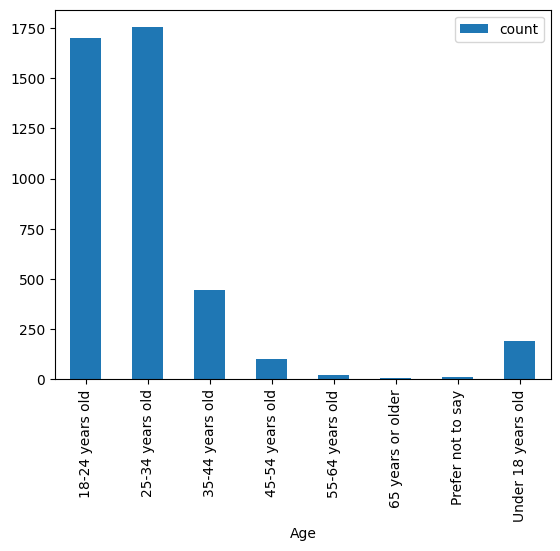

In [ ]:
df.groupby("Age")["Age"].agg(["count"]).plot.bar()

- To analyse the proffession intrest and background of those developers

In [120]:
df.groupby("Employment")["Employment"].count()

# Number of employed developers

total_emplyed_devs_mask = df["Employment"].str.contains("Employed")
total_emplyed_devs = df.loc[total_emplyed_devs_mask,"Employment"].count()

print(f"There a {total_emplyed_devs} devs who are employed in some or other manner")

# Total number of student's in our dev community

student_devs_mask = df["Employment"].str.contains("Student")
total_student_devs = df.loc[student_devs_mask].shape[0]

print(f"There are {total_student_devs} students in Indian developers community")

# Total number of employed students

total_employed_studs = df.loc[student_devs_mask & total_emplyed_devs_mask].shape[0]

print(f"There are {total_employed_studs} students who are employed in some or other manner")


There a 2830 devs who are employed in some or other manner
There are 935 students in Indian developers community
There are 127 students who are employed in some or other manner


Average compensation of Indian devs is 48921930380.79304
Median compensation of Indian devs is 1300000.0


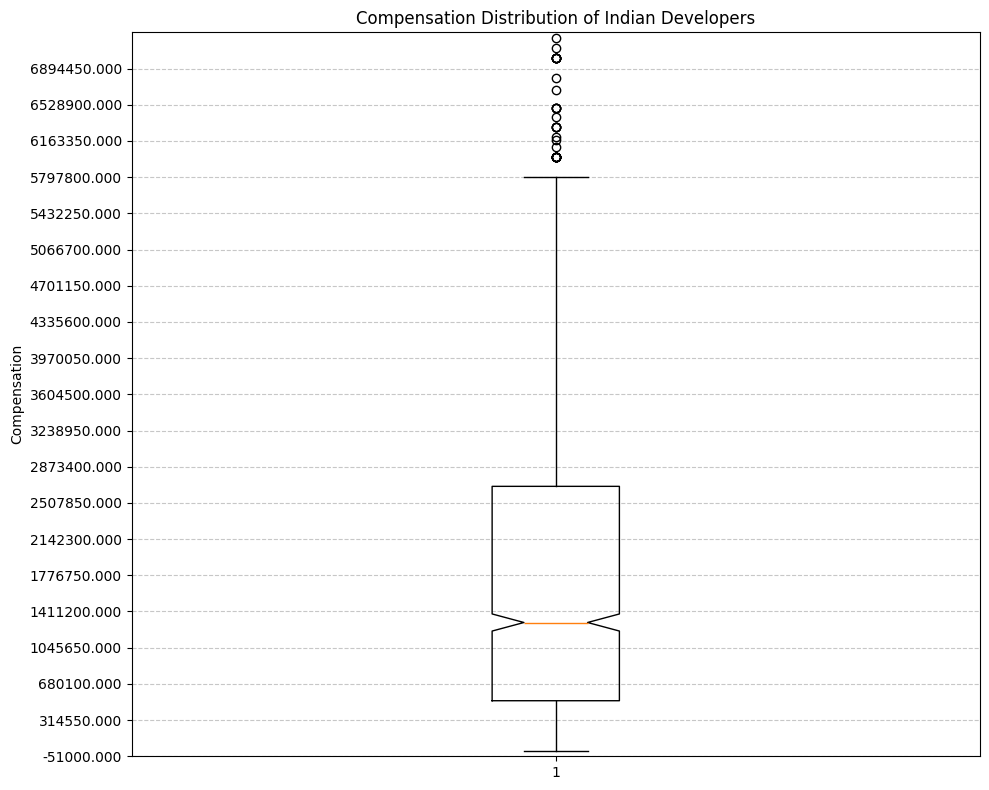

In [215]:
average_comp = df.loc[~pd.isnull(df["CompTotal"])]["CompTotal"].mean() 
median_comp = df.loc[~pd.isnull(df["CompTotal"])]["CompTotal"].median()
max_comp = df["CompTotal"].max()
min_comp = df["CompTotal"].min()

print(f"Average compensation of Indian devs is {average_comp}")
print(f"Median compensation of Indian devs is {median_comp}")

# Create figure w
plt.figure(figsize=(10, 8))

# Create boxplot
boxplot = plt.boxplot(df.loc[~pd.isnull(df["CompTotal"])]["CompTotal"], notch=True, manage_ticks=True)

q1 = df.loc[~pd.isnull(df["CompTotal"])]["CompTotal"].quantile(0.25)  
q3 = df.loc[~pd.isnull(df["CompTotal"])]["CompTotal"].quantile(0.75)  
iqr = q3 - q1

# Set y-axis limits with some padding
y_min = max(0, q1 - 1.5 * iqr) - q1/10 # i've just increased the y-axis in -ve dirction by seperating value from it
y_max = q3 + 1.5 * iqr + q3/2

plt.ylim(y_min, y_max)

tick_values = np.arange(y_min, y_max, (y_max-y_min)/20)

# convert the values to normal notation from scientific notation
tick_labels = [f"{int(x):.3f}" for x in tick_values]

# Create more ticks within the new range ad label
plt.yticks(tick_values,tick_labels)

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add labels and title
plt.title("Compensation Distribution of Indian Developers")
plt.ylabel("Compensation")

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

<Axes: xlabel='DevType'>

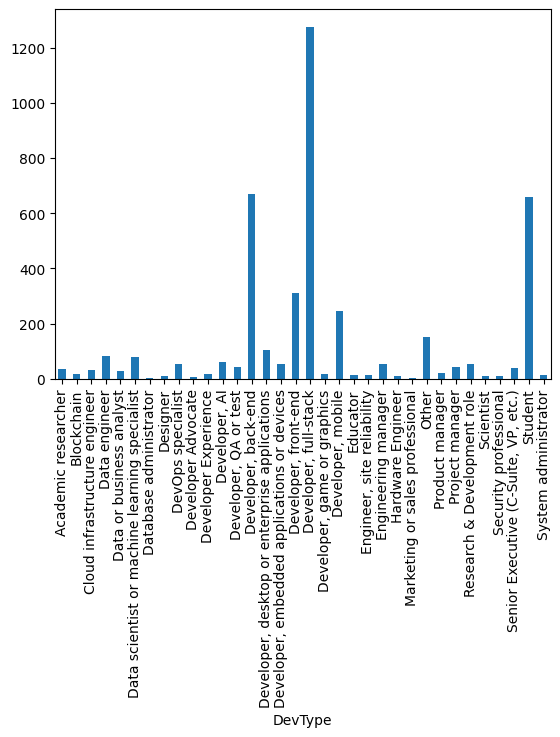

In [ ]:
df.groupby(["DevType"])["DevType"].agg("count").plot.bar()

# We can see that the most of the developers in India are fullstack developers


### Distribution of Indian students among developers

                    Students  Proffessionals
Age                                         
18-24 years old        718.0             985
25-34 years old         45.0            1709
35-44 years old          7.0             439
45-54 years old          0.0             101
55-64 years old          0.0              20
65 years or older        0.0               5
Prefer not to say        5.0               5
Under 18 years old     160.0              32 Index(['18-24 years old', '25-34 years old', '35-44 years old',
       '45-54 years old', '55-64 years old', '65 years or older',
       'Prefer not to say', 'Under 18 years old'],
      dtype='object', name='Age')


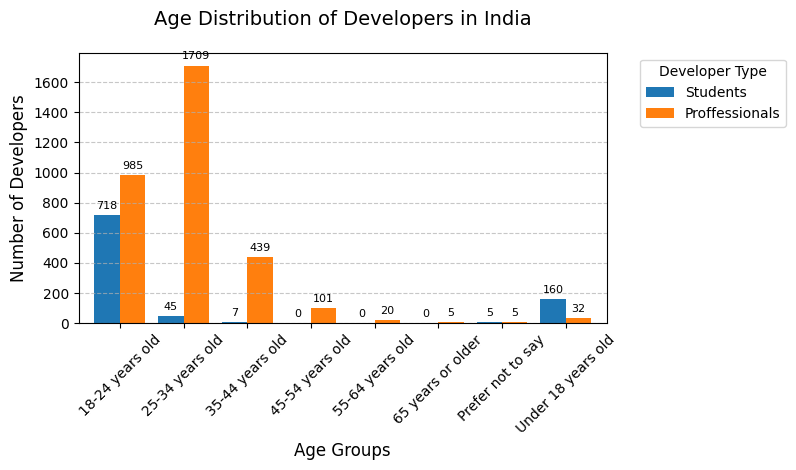

<Figure size 1000x800 with 0 Axes>

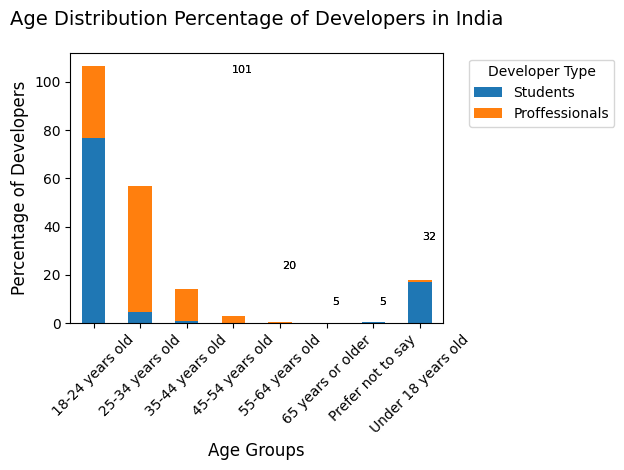

In [218]:
def age_distribution(df:pd.DataFrame):
    temp_data:pd.DataFrame = df.copy()
    temp_data["IsStudent"] = temp_data["Employment"].str.contains("Student",case=False)

    age_dist = pd.DataFrame({
        "Students": temp_data.loc[temp_data["IsStudent"],"Age"].value_counts(),
        "Proffessionals":temp_data.loc[~temp_data["IsStudent"],"Age"].value_counts(),
    }).fillna(0)

    print(age_dist,age_dist.index)

    age_dist_percentage = age_dist.div(age_dist.sum()) * 100

    ax = age_dist.plot.bar(width=0.8)

    plt.title('Age Distribution of Developers in India', fontsize=14, pad=20)
    plt.xlabel('Age Groups', fontsize=12)
    plt.ylabel('Number of Developers', fontsize=12)

    plt.xticks(rotation=45)

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()

    plt.legend(title='Developer Type', bbox_to_anchor=(1.05, 1), loc='upper left')

    # adding info about the Total Number of devs just above the bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', padding=3,fontsize=8)

    plt.figure(figsize=(10,8))

    ax2 = age_dist_percentage.plot.bar(stacked=True)

    plt.title('Age Distribution Percentage of Developers in India', fontsize=14, pad=20)
    plt.xlabel('Age Groups', fontsize=12)
    plt.ylabel('Percentage of Developers', fontsize=12)

    for containers in ax2.containers:
        ax2.bar_label(container, fmt="%.0f", padding=3, fontsize=8)

    plt.legend(title='Developer Type', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.xticks(rotation=45)
    
    plt.tight_layout()

    
age_distribution(df)
